In [41]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import glob
import os
from repeats_utils import plot_salmonTE
from sequencing_tools.viz_tools import color_encoder, okabeito_palette, simpsons_palette
from plotting_utils import figure_path
from adjustText import adjust_text

plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
TE_path = '/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/salmonTE/test*'
te_paths = glob.glob(TE_path)
res_df = map(lambda p: pd.read_csv(p + '/results.csv')\
                     .assign(samplename = os.path.basename(p)), 
             te_paths)
res_df = pd.concat(res_df) \
    .assign(log2FoldChange = lambda d: -d.log2FoldChange)
res_df.head()

,name,class,clade,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,samplename
0,ALU,Non-LTR Retrotransposon,SINE,10.175599,0.218816,0.573841,-0.381317,0.702968,0.814516,test_dnase
1,AluJb,Non-LTR Retrotransposon,SINE,28.604883,0.770579,0.259560,-2.968789,0.002990,0.027721,test_dnase
2,AluJo,Non-LTR Retrotransposon,SINE,1.954516,2.558861,0.820159,-3.119955,0.001809,0.020588,test_dnase
3,AluJr,Non-LTR Retrotransposon,SINE,2.014157,0.225349,0.549258,-0.410279,0.681601,0.799333,test_dnase
4,AluJr4,Non-LTR Retrotransposon,SINE,1.253133,-1.139480,0.589382,1.933346,0.053194,0.189281,test_dnase


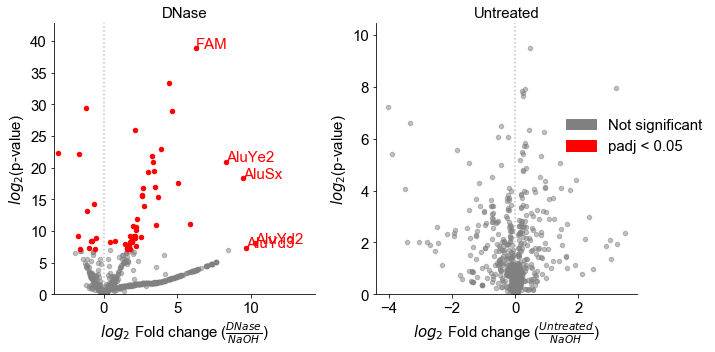

In [43]:
fig = plt.figure(figsize = (10,5))
for i, (exp, exp_df) in enumerate(res_df.groupby('samplename')):
    treatment = exp.split('_')[1].capitalize().replace('Dn','DN')
    ax = fig.add_subplot(1,2,i+1)
    texts = plot_salmonTE(exp_df, treatment, ax)
sns.despine()
pat = [mpatches.Patch(color=col, label=lab) for col, lab in zip(['gray', 'red'], ['Not significant','padj < 0.05'])]
ax.legend(handles=pat, bbox_to_anchor = (1.3, 0.7), frameon=False, fontsize=15)
fig.tight_layout()
fig.savefig(figure_path + '/salmonTE_all.pdf')

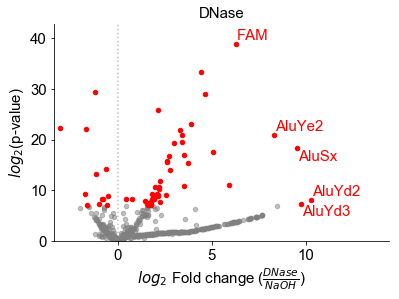

In [44]:
ax = plt.subplot()
texts = plot_salmonTE(res_df.query('samplename=="test_dnase"'), 'DNase', ax)
sns.despine()
adjust_text(texts)
plt.savefig(figure_path + '/salmonTE.pdf', bbox_inches='tight')